In [2]:
pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.4 MB/s eta 0:00:00


In the following, we investigate exemplarily a bi-objective optimization with two constraints. We tried to select a suitable optimization problem with enough complexity for demonstration purposes, but not too difficult to lose track of the overall idea. Its definition is given by:

$$
\begin{aligned}
\min & f_1(x)=\left(x_1^2+x_2^2\right) \\
\max & f_2(x)=-\left(x_1-1\right)^2-x_2^2 \\
\text { s.t. } & g_1(x)=2\left(x_1-0.1\right)\left(x_1-0.9\right) \leq 0 \\
& g_2(x)=20\left(x_1-0.4\right)\left(x_1-0.6\right) \geq 0 \\
& -2 \leq x_1 \leq 2 \\
& -2 \leq x_2 \leq 2
\end{aligned}
$$


It consists of two objectives $(M=2)$ where $f_1(x)$ is minimized and $f_2(x)$ maximized. The optimization is with subject to two inequality constraints $(J=2)$ where $g_1(x)$ is formulated as a less than and $g_2(x)$ as a greater than constraint. The problem is defined with respect to two variables $(N=2), x_1$ and $x_2$, which both are in the range $[-2,2]$. The problem does not contain any equality constraints ( $K=0$ ).

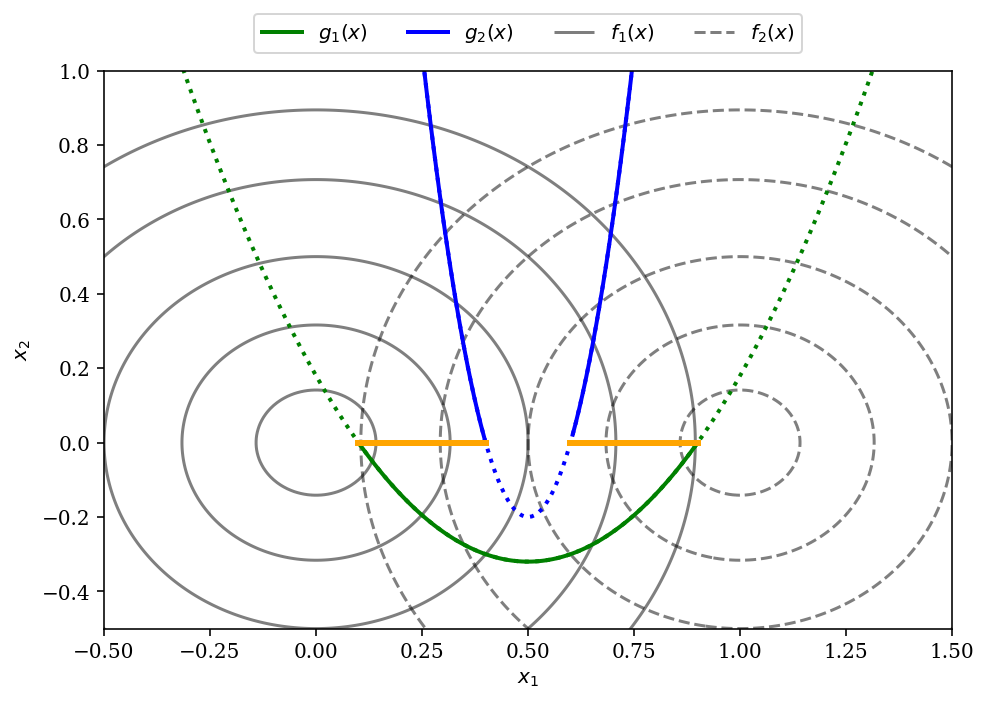


The figure above shows the contours of the problem. The contour lines of the objective function $f_1(x)$ is represented by a solid and $f_2(x)$ by a dashed line. The constraints $g_1(x)$ and $g_2(x)$ are parabolas which intersect the $x_1$-axis at $(0.1,0.9)$ and $(0.4,0.6)$. A thick orange line illustrates the pareto-optimal set. Through the combination of both constraints, the pareto-set is split into two parts. Analytically, the pareto-optimal set is given by $P S=\left\{\left(x_1, x_2\right) \mid\left(0.1 \leq x_1 \leq 0.4\right) \vee\left(0.6 \leq x_1 \leq 0.9\right) \wedge x_2=0\right\}$ and the Pareto-front by $f_2=\left(\sqrt{f_1}-1\right)^2$ where $f_1$ is defined in $[0.01,0.16]$ and $[0.36,0.81]$.
2. Implementation of a Problem

In pymoo, we consider minimization problems for optimization in all our modules. However, without loss of generality, an objective that is supposed to be maximized can be multiplied by -1 and be minimized. Therefore, we minimize $-f_2(x)$ instead of maximizing $f_2(x)$ in our optimization problem. Furthermore, all constraint functions need to be formulated as a $\leq 0$ constraint. The feasibility of a solution can, therefore, be expressed by:

$$
\begin{gathered}
\quad\left\{\begin{array}{l}
\text { feasible }, \\
\text { infeasbile, }
\end{array} \quad \sum_i^n\left\langle g_i(x)\right\rangle=0\right. \\
\text { otherwise }
\end{gathered}
$$


For this reason, $g_2(x)$ needs to be multiplied by -1 in order to flip the $\geq$ to a $\leq$ relation. We recommend the normalization of constraints to give equal importance to each of them. For $g_1(x)$, the coefficient results in $2 \cdot(-0.1) \cdot(-0.9)=0.18$ and for $g_2(x)$ in $20 \cdot(-0.4) \cdot(-0.6)=4.8$, respectively. We achieve normalization of constraints by dividing $g_1(x)$ and $g_2(x)$ by its corresponding coefficient.

Finally, the optimization problem to be optimized using pymoo is defined by:

$$
\begin{array}{ll}
\min & f_1(x)=\left(x_1^2+x_2^2\right) \\
\min & f_2(x)=\left(x_1-1\right)^2+x_2^2 \\
\text { s.t. } & g_1(x)=2\left(x_1-0.1\right)\left(x_1-0.9\right) / 0.18 \leq 0 \\
& g_2(x)=-20\left(x_1-0.4\right)\left(x_1-0.6\right) / 4.8 \leq 0 \\
& -2 \leq x_1 \leq 2 \\
& -2 \leq x_2 \leq 2
\end{array}
$$

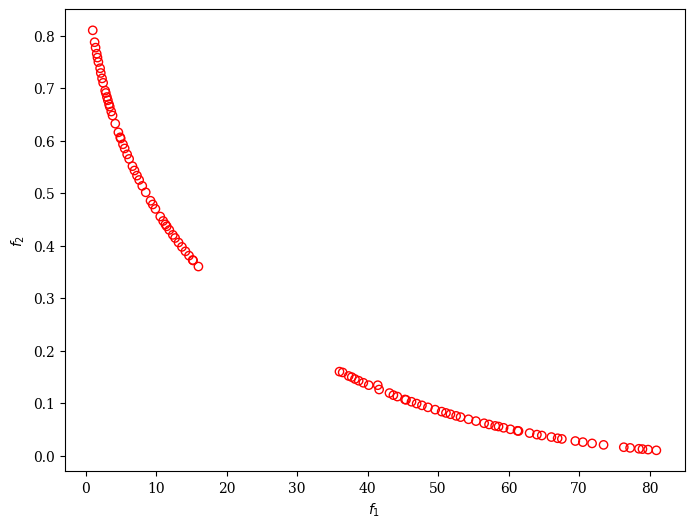

In [7]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[1] ** 2

        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=False,
               seed=1)

plot = Scatter()
plot.add(res.F, edgecolor="red", facecolor="none")
plot.show()